### Project 1, TMA4215 Numerical Mathematics

#### Candidate number: 10157

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift, fftfreq, ifft
import pandas as pd #to read the csv
import sounddevice as sd #sound
import soundfile as sf 
import librosa
from scipy.signal import resample
from scipy.signal import stft
from scipy import signal 
import noisereduce as nr


### Problem 1

#### 1a) 

We consider the function $e^{2\pi i k }$ and want to show


$$
\langle e^{2\pi i k }, e^{2\pi i h } \rangle =
\begin{cases}
1 & \text{if } k = h, \\
0 & \text{if } k \neq h.
\end{cases}
$$



The inner product is defined like 

$$
\langle f, g \rangle = \int_0^1 f(x) \overline{g(x)} \, dx,
$$


In our case, we have

$$
\langle e^{2\pi i k x}, e^{2\pi i h x} \rangle = \int_0^1 e^{2\pi i k x} \overline{e^{2\pi i h x}} \, dx.
$$

Using the complex conjugate, the integrand becomes

$$
e^{2\pi i k x} \overline{e^{2\pi i h x}} = e^{2\pi i k x} e^{-2\pi i h x} = e^{2\pi i (k - h) x}.
$$

Thus, the inner product is:

$$
\langle e^{2\pi i k x}, e^{2\pi i h x} \rangle = \int_0^1 e^{2\pi i (k - h) x} \, dx.
$$

We can now evaluate the integral.

In the first case, we have $k=h$ which gives

$$
e^{2\pi i (k - h) x} = e^{0} = 1.
$$

In this case, the inner product is:

$$
\langle e^{2\pi i k x}, e^{2\pi i h x} \rangle = \int_0^1 1 \, dx = 1.
$$

In the second case, when $k \neq h$ the integrand becomes:

$$
e^{2\pi i (k - h) x}.
$$

So

$$
\int_0^1 e^{2\pi i (k - h) x} \, dx = \left[ \frac{e^{2\pi i (k - h) x}}{2\pi i (k - h)} \right]_0^1.
$$

Evaluated from 0 to 1 gives:

$$
\frac{e^{2\pi i (k - h) \cdot 1} - e^{2\pi i (k - h) \cdot 0}}{2\pi i (k - h)} = \frac{e^{2\pi i (k - h)} - 1}{2\pi i (k - h)}.
$$

Since $e^{2\pi i (k - h)} = 1$ for any integer $k - h$, the expression becomes:

$$
\frac{1 - 1}{2\pi i (k - h)} = 0.
$$

We have now shown that:

$$
\langle e^{2\pi i k x}, e^{2\pi i h x} \rangle =
\begin{cases}
1 & \text{if } k = h, \\
0 & \text{if } k \neq h.
\end{cases}
$$

Hence proved. 



#### 1b) 

We would like to ignore the variable $x$ in the inner product, but in order to make the computations easier (or easier to keep track on), we will use $x$ in this problem. However, we can simply also just not include variable $x$ and think of it (inner product without $x$) as just as variable we did not assign a name to.

i)

We want to show that:

$$
\langle \sqrt{2} \sin(2\pi n x), \sqrt{2} \cos(2\pi m x) \rangle = 0 \quad 
$$ 
for $n \in \{1, 2, \dots\}, m \in \{0, 1, \dots\}$,

The inner product is defined as:

$$
\langle \sqrt{2} \sin(2\pi n x), \sqrt{2} \cos(2\pi m x) \rangle = 2 \int_0^1 \sin(2\pi n x) \cos(2\pi m x) \, dx.
$$

Using the identity:

$$
\sin(A)\cos(B) = \frac{1}{2} [\sin(A + B) + \sin(A - B)],
$$

we get:

$$
2 \int_0^1 \sin(2\pi n x) \cos(2\pi m x) \, dx = \int_0^1 \sin(2\pi(n + m)x) \, dx + \int_0^1 \sin(2\pi(n - m)x) \, dx.
$$

Both integrals are 0 because the integral of $ \sin(2\pi kx)$ over $ [0, 1] $ is 0 for any integer $ k $. That is:

$$
\int_0^1 \sin(2\pi k x) \, dx = 0.
$$

Thus, we have:

$$
\langle \sqrt{2} \sin(2\pi n x), \sqrt{2} \cos(2\pi m x) \rangle = 0.
$$

ii)

Now we want to show that:

$$
\langle \sqrt{2} \sin(2\pi n x), \sqrt{2} \sin(2\pi m x) \rangle = \begin{cases} 
0 & \text{if } n \neq m, \\
1 & \text{if } n = m.
\end{cases}
$$

The inner product is:

$$
\langle \sqrt{2} \sin(2\pi n x), \sqrt{2} \sin(2\pi m x) \rangle = 2 \int_0^1 \sin(2\pi n x) \sin(2\pi m x) \, dx.
$$

Using the identity:

$$
\sin(A)\sin(B) = \frac{1}{2} [\cos(A - B) - \cos(A + B)],
$$

we get:

$$
2 \int_0^1 \sin(2\pi n x) \sin(2\pi m x) \, dx = \int_0^1 \cos(2\pi(n - m)x) \, dx - \int_0^1 \cos(2\pi(n + m)x) \, dx.
$$

Now, we evaluate each case:

- If $ n = m $, the first term becomes $ \int_0^1 \cos(0) \, dx = 1 $ and the second term is $ \int_0^1 \cos(2\pi(2n)x) \, dx = 0 $, so:

$$
\langle \sqrt{2} \sin(2\pi n x), \sqrt{2} \sin(2\pi n x) \rangle = 1.
$$

- If $n \neq m $, both integrals $ \int_0^1 \cos(2\pi(n - m)x) \, dx = 0 $ and $ \int_0^1 \cos(2\pi(n + m)x) \, dx = 0 $, so here we get

$$
\langle \sqrt{2} \sin(2\pi n x), \sqrt{2} \sin(2\pi m x) \rangle = 0.
$$

iii)

Finally, we need to show that:

$$
\langle \sqrt{2} \cos(2\pi n x), \sqrt{2} \cos(2\pi m x) \rangle = \begin{cases} 
0 & \text{if } n \neq m, \\
1 & \text{if } n = m \neq 0, \\
2 & \text{if } n = m = 0.
\end{cases}
$$

The inner product is:

$$
\langle \sqrt{2} \cos(2\pi n x), \sqrt{2} \cos(2\pi m x) \rangle = 2 \int_0^1 \cos(2\pi n x) \cos(2\pi m x) \, dx.
$$

Using yet another identity:

$$
\cos(A)\cos(B) = \frac{1}{2} [\cos(A - B) + \cos(A + B)],
$$

we get:

$$
2 \int_0^1 \cos(2\pi n x) \cos(2\pi m x) \, dx = \int_0^1 \cos(2\pi(n - m)x) \, dx + \int_0^1 \cos(2\pi(n + m)x) \, dx.
$$

If we evaluate each case, we indeed get 

$$
\langle \sqrt{2} \cos(2\pi n x), \sqrt{2} \cos(2\pi m x) \rangle = \begin{cases} 
0 & \text{if } n \neq m, \\
1 & \text{if } n = m \neq 0, \\
2 & \text{if } n = m = 0.
\end{cases}
$$



We have now proved the three conditions required for orthonormalit.
Thus, the given functions 
$$
\sqrt{2} \cos(2\pi n x), \quad n = 1, 2, \dots, \quad x \in \mathbb{T}.
$$

and 

$$
\sqrt{2} \sin(2\pi n x), \quad m = 1, 2, \dots, \cos(2\pi 0 x).
$$

form an orthonormal system.


### 1c) 

We will divide this part into 3 sections. 

1.1 Orthonormal bases for $T_{n}$

The space $T_{n}$ is defined like

$$
T_n := \text{span} \left\{ e^{-2\pi i n x}, \ldots, e^{2\pi i n x} \right\}
$$

where $ n $ ranges from $ -n $ to $ n $. This can be expressed as:

$$
T_n = \left\{ \sum_{k=-n}^{n} c_k e^{2\pi i k x} \mid c_k \in \mathbb{C} \right\}
$$

To find an orthonormal basis for $T_{n}$, we will consider the following exponential functions from 1a and 1b

$e^{2\pi i k x}$ for $ k = -n, \ldots, n $

We can immediately notice that these functions are normalized since they equal to 1. Moreover, 

For $k \neq m $:

$$
\left\langle e^{2\pi i k x}, e^{2\pi i m x} \right\rangle = \int_0^1 e^{2\pi i k x} \overline{e^{2\pi i m x}} \, dx = \int_0^1 e^{2\pi i (k - m) x} \, dx
$$

Evaluating this integral:

$$
\int_0^1 e^{2\pi i (k - m) x} \, dx = \frac{e^{2\pi i (k - m) x}}{2\pi i (k - m)} \Bigg|_0^1 = \frac{e^{2\pi i (k - m)} - 1}{2\pi i (k - m)}
$$

Since $ e^{2\pi i (k - m)} = 1 $, we get:

$$
\frac{1 - 1}{2\pi i (k - m)} = 0
$$

Thus:

$$
\left\langle e^{2\pi i k x}, e^{2\pi i m x} \right\rangle = 0 \text{ for } k \neq m
$$


So the functions $ e^{2\pi i k x} $ for $ k = -n, \ldots, n $ form an orthonormal basis for $T_{n}$ 


1.2 Orthonormal bases for $Sn$



The space $Sn$ is defined as:

$$
S_n := \text{span} \left\{ \cos(0 \cdot x), \cos(2\pi x), \ldots, \cos(2\pi n x), \sin(2\pi x), \sin(2\pi 2 x), \ldots, \sin(2\pi n x) \right\}
$$

This can be expressed as:

$$
S_n = \left\{ a_0 \frac{1}{2} + \sum_{k=1}^{n} a_k \cos(2\pi k x) + b_k \sin(2\pi k x) \mid a_0, a_1, \ldots, a_n, b_1, \ldots, b_n \in \mathbb{R} \right\}
$$ 

To find an orthonormal basis for $Sn$, I will consider the following functions from 1a and 1b:

1. Constant Function: $ \frac{1}{\sqrt{2}} $
2. Cosine Functions: $ \sqrt{2} \cos(2\pi k x) $ for $ k = 1, 2, \ldots, n $
3. Sine Functions: $\sqrt{2} \sin(2\pi k x)$ for $k = 1, 2, \ldots, n $

It is already shown that the functions 

$ \frac{1}{\sqrt{2}} $, $ \sqrt{2} \cos(2\pi k x) $ for $ k = 1, \ldots, n $, and $ \sqrt{2} \sin(2\pi k x)$ for $ k = 1, \ldots, n $ form an orthonormal basis for $ S_n $ beacuse each function is normalized and the inner products are zero for distinct functions and one for identical functions.

This basis covers all functions in $S_n$ and thus forms an orthonormal basis for the space.




1.3 $T_{n}=S_{n}$

$T_{n}$ and $S_{n}$ are equivalent because every function $T_{n}$ can be expressed in terms of the functions in $S_{n}$ using Eulers formula. As known, every complex exponential can be expressed as a combination of cosine and sine functions. Therefore, the space spanned by these complex exponentials $T_{n}$
can also be spanned by real trigonometric functions, which indeed is the basis functions of $S_{n}$.


The dimension of $T_{n}$ and $S_{n}$ is $2n-1$ because the basis function of $T_{n}$ is 
$$
T_n := \text{span} \left\{ e^{-2\pi i n x}, \ldots, e^{2\pi i n x} \right\}
$$

and there are $2n-1$ such basis functions ranging from $k = -n$ to $k=n$

#### 1d) 

In this problem, we will use the represention of $S_{n}$ to find the Fourier foefficients $a_k$ and $b_k$ of a function $f \in S_n$. In order to do this, we will use inner product as well as the orthonormal bases that we found in 1c). 

$$
S_n = \left\{ a_0 \frac{1}{2} + \sum_{k=1}^{n} a_k \cos(2\pi k x) + b_k \sin(2\pi k x) \mid a_0, a_1, \ldots, a_n, b_1, \ldots, b_n \in \mathbb{R} \right\}
$$

So, any function $f \in S_n$ can be written as:

$$
f(x) = a_0 \frac{1}{2} + \sum_{k=1}^{n} a_k \cos(2\pi k x) + b_k \sin(2\pi k x)
$$


To find $a_k$, we will use the cosine functions $ \sqrt{2} \cos(2\pi k x) $ from the orthonormal basis of $S_{n}$:

$$
a_k = \langle f, \sqrt{2} \cos(2\pi k x) \rangle
$$

Thus:

$$
a_k = 2 \langle f, \cos(2\pi k x) \rangle = 2 \int_{-1/2}^{1/2} f(x) \cos(2\pi k x) \, dx
$$

Note here the factor of 2 because we are adjusting for the normalization of the basis functions. Each basis function is scaled by $\sqrt(2)$, and when computing the coefficients, we need to consider this scaling factor.

To find $b_k$ , we will use the sine functions $\sqrt{2} \sin(2\pi k x)$:

$$
b_k = \langle f, \sqrt{2} \sin(2\pi k x) \rangle
$$

Thus:

$$
b_k = 2 \langle f, \sin(2\pi k x) \rangle = 2 \int_{-1/2}^{1/2} f(x) \sin(2\pi k x) \, dx
$$

Hence proven that the Fourier coefficients of $S_{n}$ are 

$$
a_k = 2 \int_{-1/2}^{1/2} f(x) \cos(2\pi k x) \, dx
$$


$$
b_k = 2 \int_{-1/2}^{1/2} f(x) \sin(2\pi k x) \, dx
$$


### 1e)

Computing th Fourier coefficients can be quite time-consuming. We will now approximate the Fourier coefficients $c_{k}(f)$ of a function $f$ using equidistant points and the composite trapezoidal rule. We want to use the equidistant points  to approximate the integral required for the Fourier coefficients. As mentioned, we will use the composite Trapezoidal rule, which extends the single-interval trapezoidal rule to handle integrals over multiple subintervals. 

The composite trapezoidal rule approximates an integral $ \int_a^b f(x) \, dx $ by:

$$
\int_a^b f(x) \, dx \approx \frac{h}{2} \left[ f(a) + 2 \sum_{j=1}^{n-1} f(a + jh) + f(b) \right]
$$

For the Fourier coefficient $c_k(f)$, we need to approximate the integral:

$$
c_k(f) = \int_0^1 f(x) e^{-2\pi i k x} \, dx
$$

By dividing the interval $[0,1)$ into $N$ subintervals of equal width, we then get

$$
h = \frac{1}{N}
$$

We then let $g(x)$ be defined like
$g(x) = f(x) e^{-2\pi i k x} $ 

So this means
$x_j = \frac{j}{N} $, where $j = 0, 1, \ldots, N-1$. 

Let now also 

$$
g_j = f(x_j) e^{-2\pi i k x_j}
$$

Applying the composite trapezoidal rule, we then will get

$$
\int_0^1 f(x) e^{-2\pi i k x} \, dx \approx \frac{h}{2} \left[ g_0 + 2 \sum_{j=1}^{N-2} g_j + g_{N-1} \right]
$$

Substituting $h = \frac{1}{N}$  and $g_j = f_j e^{-2\pi i k \frac{j}{N}}$:

$$
\int_0^1 f(x) e^{-2\pi i k x} \, dx \approx \frac{1}{2N} \left[ f_0 e^{-2\pi i k \cdot 0} + 2 \sum_{j=1}^{N-2} f_j e^{-2\pi i k \frac{j}{N}} + f_{N-1} e^{-2\pi i k \cdot \frac{N-1}{N}} \right]
$$

Since $e^{-2\pi i k \cdot 0} = 1$ and $e^{-2\pi i k \cdot \frac{N-1}{N}} = e^{-2\pi i k} = 1$

$$
\int_0^1 f(x) e^{-2\pi i k x} \, dx \approx \frac{1}{N} \left[ \frac{1}{2} \left( f_0 + f_{N-1} \right) + \sum_{j=1}^{N-2} f_j e^{-2\pi i k \frac{j}{N}} \right]
$$

The sum sums over all points $j$ and therfore include $f_{0}$ and $f_{N-1}$ so the the expression above simplifies to

$$
c_k(f) \approx \frac{1}{N} \sum_{j=0}^{N-1} f_j e^{-2\pi i k \frac{j}{N}}
$$

Hence prove that

$$
\hat{f}_k = \frac{1}{N} \sum_{j=0}^{N-1} f_j e^{-2\pi i k \frac{j}{N}}
$$


Now, we will also show that $\hat{f}_k$ is $N$ periodic. 

We now have
$$
\hat{f}_k = \frac{1}{N} \sum_{j=0}^{N-1} f_j e^{-2\pi i k \frac{j}{N}}.
$$

We will start by computing $\hat{f}_{k+N}$ and compare it with $\hat{f}_k$.

The expression for $\hat{f}_{k+N}$ is:

$$
\hat{f}_{k+N} = \frac{1}{N} \sum_{j=0}^{N-1} f_j e^{-2\pi i (k+N) \frac{j}{N}}.
$$

Simplifying the exponent:

$$
\hat{f}_{k+N} = \frac{1}{N} \sum_{j=0}^{N-1} f_j e^{-2\pi i k \frac{j}{N}} e^{-2\pi i N \frac{j}{N}}.
$$

Since $e^{-2\pi i N \frac{j}{N}} = e^{-2\pi i j}$, and $ e^{-2\pi i j} = 1$ for any integer $j$, we have:

$$
\hat{f}_{k+N} = \frac{1}{N} \sum_{j=0}^{N-1} f_j e^{-2\pi i k \frac{j}{N}}.
$$

This is exactly the same as $\hat{f}_k$. Therefore, we have shown that:

$$
\hat{f}_{k+N} = \hat{f}_k \quad \text{for all} \, k \in \mathbb{Z}.
$$

This result is important to us, because this shows that the discrete Fourier transform (DFT) repeats itself after every $N$ terms. 

#### 1f) 

Here, we want to prove that

$$
\frac{1}{N} \sum_{j=0}^{N-1} e^{-2\pi ijk/N} =
\begin{cases}
1 & \text{if } k \mod N = 0, \\
0 & \text{else}
\end{cases}
$$


Case 1: $k \mod N = 0$

When $k \mod N = 0$, we have $k = mN$ for some integer $m$ . Substituting this into the sum, we get

$$
\frac{1}{N} \sum_{j=0}^{N-1} e^{-2\pi ij \cdot mN / N} = \frac{1}{N} \sum_{j=0}^{N-1} e^{-2\pi i j m}.
$$

Since  $e^{-2\pi i j m} = 1$ for all $j$

$$
\frac{1}{N} \sum_{j=0}^{N-1} 1 = \frac{1}{N} \cdot N = 1.
$$

This shows that when $k \mod N = 0$, the sum is 1.

Case 2: $k \mod N \neq 0$

In this case, the terms in the sum represent a geometric series!

$$
S = \sum_{j=0}^{N-1} e^{-2\pi i j k / N}.
$$

This is a geometric series with ratio $r = e^{-2\pi i k / N}$, thus the sum is given by 
$$
S = \frac{1 - r^N}{1 - r}.
$$

Substituting in r, we get the following

$$
S = \frac{1 - e^{-2\pi i k}}{1 - e^{-2\pi i k / N}}.
$$

Since (again), $e^{-2\pi i k} = 1$, this simplifies to:

$$
S = \frac{1 - 1}{1 - e^{-2\pi i k / N}} = 0.
$$

Therefore, when $k \mod N \neq 0$ , the sum is 0.

Hence proven that

$$
\frac{1}{N} \sum_{j=0}^{N-1} e^{-2\pi ijk/N} =
\begin{cases}
1 & \text{if } k \mod N = 0, \\
0 & \text{if } k \mod N \neq 0.
\end{cases}
$$


#### 1g) 

We want to prove that the inverse $ \mathcal{F}_N^{-1} $ is a scaled version of the complex conjugate $ \overline{\mathcal{F}_N}$, where

$$
\mathcal{F}_N^{-1} = \frac{1}{N} \overline{\mathcal{F}_N}.
$$


The DFT matrix is given by

$$
\mathcal{F}_N = \left( e^{-2\pi i k l / N} \right)_{k,l=0}^{N-1},
$$



The complex conjugate here is simply flipping the sign in the exponent

$$
\overline{\mathcal{F}_N} = \left( e^{2\pi i k l / N} \right)_{k,l=0}^{N-1}.
$$

Since we are asked to find a scaled version of the complex conjugate, let us start by computing the following product

$$
(\mathcal{F}_N \overline{\mathcal{F}_N})_{k,m} = \sum_{l=0}^{N-1} e^{-2\pi i k l / N} \cdot e^{2\pi i m l / N}.
$$

This simplifies to:

$$
(\mathcal{F}_N \overline{\mathcal{F}_N})_{k,m} = \sum_{l=0}^{N-1} e^{2\pi i (m - k) l / N}.
$$

If $k=m$, we can see that the exponent becomes 0, so every term in the sum is 1:

$$
\sum_{l=0}^{N-1} e^{0} = N.
$$

If  $k \neq m$ The sum is again a geometric series where the sum is 0.

$$
\sum_{l=0}^{N-1} e^{2\pi i (m - k) l / N} = 0.
$$

This gives

$$
\mathcal{F}_N \overline{\mathcal{F}_N} = N I_N,
$$

where $I_N$ is the $ N \times N $ identity matrix.

Finally,by multiplying both sides by $\frac{1}{N} $, we get:

$$
\frac{1}{N} \mathcal{F}_N \overline{\mathcal{F}_N} = I_N,
$$

which proves

$$
\mathcal{F}_N^{-1} = \frac{1}{N} \overline{\mathcal{F}_N}.
$$

Furthermore, a lot of mathematicians like this scaled version $\frac{1}{\sqrt{N}} \mathcal{F}_N$ because it makes the DFT and its inverse symmetric! This is because hte product matrix $\mathcal{F}_N \overline{\mathcal{F}_N} $ is a diagonal matrix with $N$ on the diagonal:



#### 1h) 

Here we want to prove that the Fourier Matrix in the previous task, $ \mathcal{F}_N$ diagonalizes the circulant matrix. Specifically for a vector $ \mathbf{a} $, the circulant matrix denoted as $ \text{circ}(\mathbf{a}) $ , can be diagonalized by the Fourier matrix 

$$
\text{circ}(\mathbf{a}) = \mathcal{F}_N^{-1} \text{diag}(\hat{\mathbf{a}}) \mathcal{F}_N,
$$


The circulant matrix for a vector is 

$$
\text{circ}(\mathbf{a}) = 
\begin{pmatrix}
a_0 & a_{N-1} & \dots & a_1 \\
a_1 & a_0 & \dots & a_2 \\
\vdots & \vdots & \ddots & \vdots \\
a_{N-1} & a_{N-2} & \dots & a_0 \\
\end{pmatrix}.
$$

We have that the eigenvectors of the circulant matrix are the columns of the DFT matrix, and the eigenvalues are the Fourier coefficients.

From the previous task, we have that The Fourier Matrix and its inverse

$$
\mathcal{F}_N = \left( e^{-2\pi i k l / N} \right)_{k,l=0}^{N-1},
$$


$$
\mathcal{F}_N^{-1} = \frac{1}{N} \left( e^{2\pi i k l / N} \right)_{k,l=0}^{N-1}.
$$

By multiplying the circulant matrix with the the DFT matrix, we want to diagonalize it 

$$
\mathcal{F}_N \text{circ}(\mathbf{a}) \mathcal{F}_N^{-1} = \text{diag}(\hat{\mathbf{a}}).
$$

If we start by applying the Fourier transform to the vector $ \mathbf{a} $:

$$
\hat{\mathbf{a}} = \mathcal{F}_N \mathbf{a}.
$$

Here it looks like the circulant matrix acts as a convolution operation in the time domain. This corresponds to a multiplication in the frequency domain. So if we apply the inverse Fourier transform to the diagonal matrix of $\hat{\mathbf{a}} $ and then ack to the time domain, we get 

$$
\text{circ}(\mathbf{a}) = \mathcal{F}_N^{-1} \text{diag}(\hat{\mathbf{a}}) \mathcal{F}_N.
$$

Hence proved that the circulant matrix is diagonalized by the Fourier matrix.



#### 1i)

<>:36: SyntaxWarning: invalid escape sequence '\h'
<>:37: SyntaxWarning: invalid escape sequence '\h'
<>:36: SyntaxWarning: invalid escape sequence '\h'
<>:37: SyntaxWarning: invalid escape sequence '\h'
/var/folders/6w/vv28pss1509gsc5gscm4qtwr0000gn/T/ipykernel_17985/3665622405.py:36: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(freq, np.real(f_hat), label="Real part of $\hat{f}$", color="blue")
/var/folders/6w/vv28pss1509gsc5gscm4qtwr0000gn/T/ipykernel_17985/3665622405.py:37: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(freq, np.imag(f_hat), label="Imaginary part of $\hat{f}$", color="red")


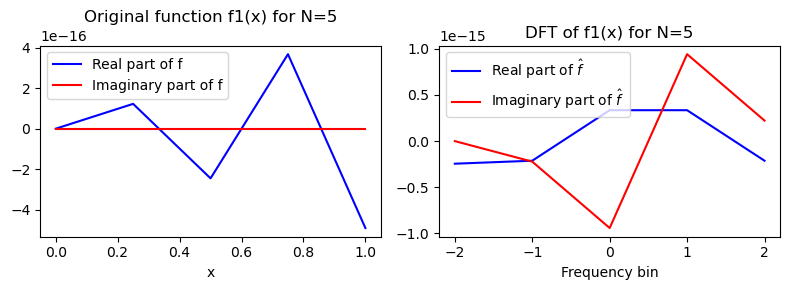

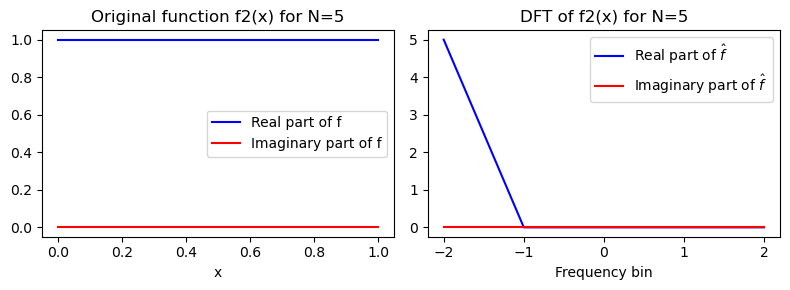

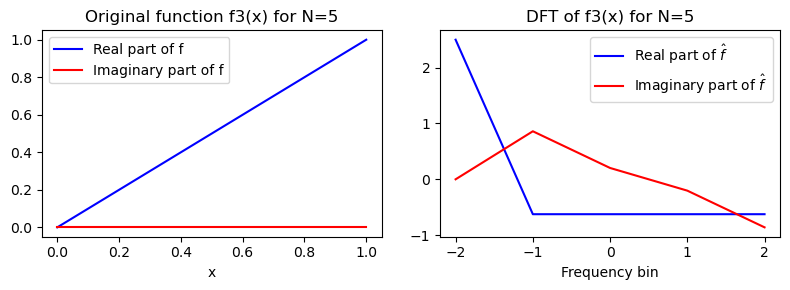

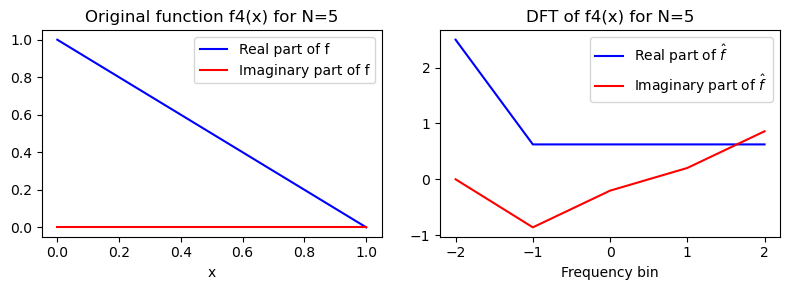

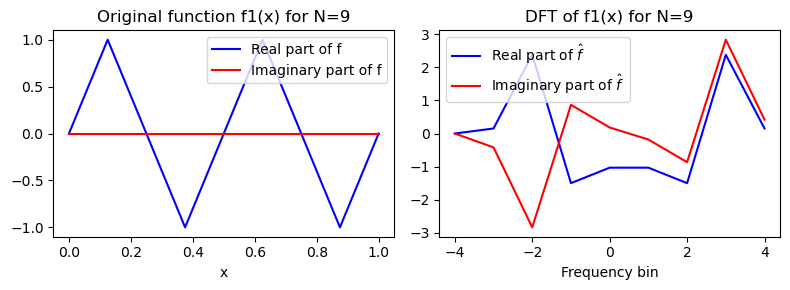

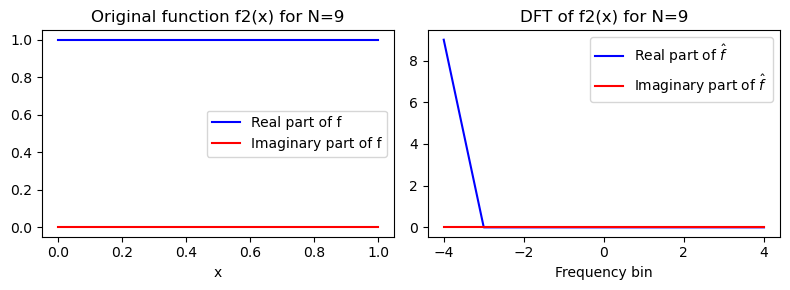

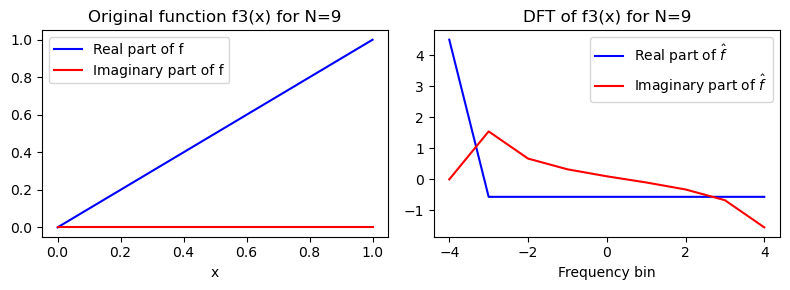

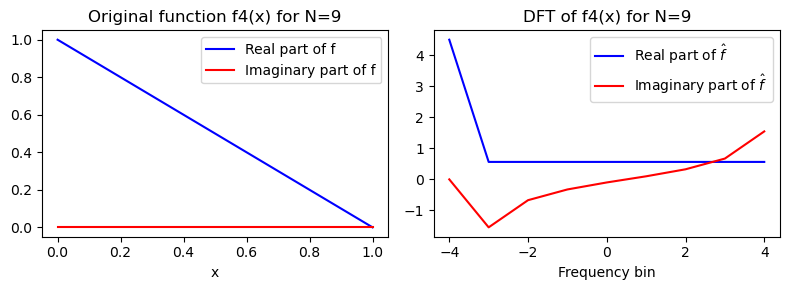

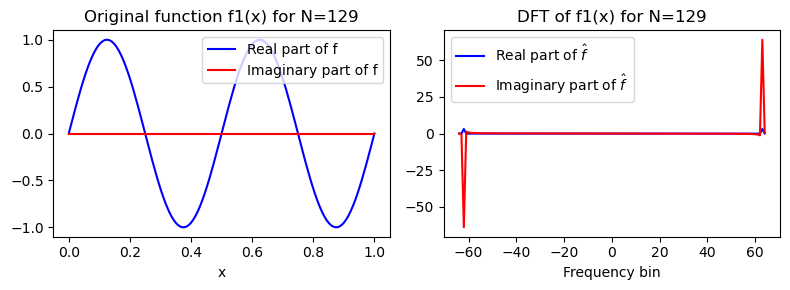

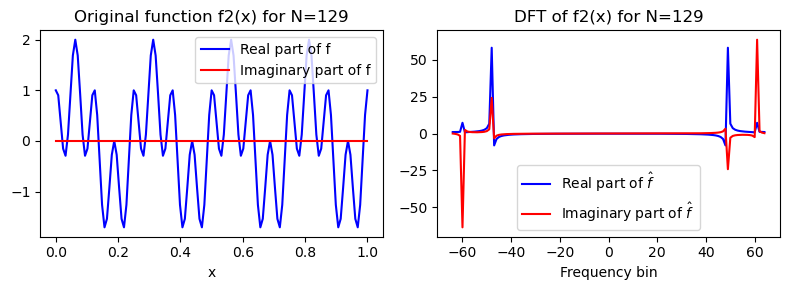

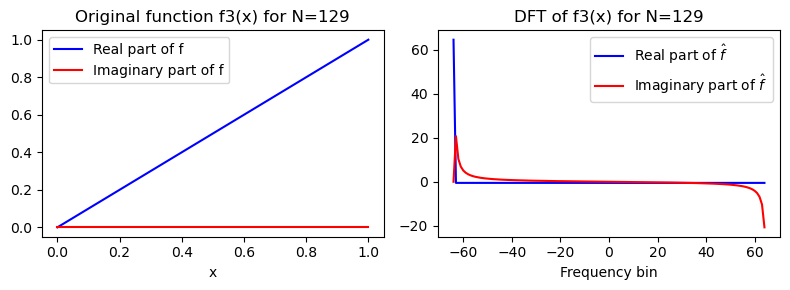

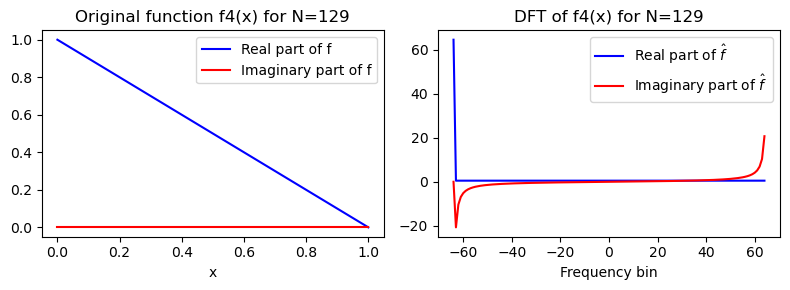

In [3]:
# Defining the transform function
def transform(f, N, start=0.0):
    x_val = np.linspace(start, start + 1, N)  # N evenly spaced points
    
    f_val = np.zeros(len(x_val))
    for i, x in enumerate(x_val):  
        f_val[i] = f(x)
    
    f_hat = fft(f_val)  # Perform the DFT (using FFT)
    return f_val, f_hat

# Defining the plot function that will plot f and f_hat 
def plot(f, N, f_name, start=0.0):
    f_values, f_hat = transform(f, N, start)

    plt.figure(figsize=(8, 3))
    
    # Plot f(x)
    plt.subplot(1, 2, 1)
    x_axis = np.linspace(start, start + 1, N)
    y_axis_real = np.real(f_values)
    plt.plot(x_axis, y_axis_real, label="Real part of f", color="blue")

    # Plot if f(x) is not a pure real function
    y_axis_imag = np.imag(f_values)
    plt.plot(x_axis, y_axis_imag, label="Imaginary part of f", color="red")
    plt.title(f"Original function {f_name}(x) for N={N}")
    plt.xlabel("x")
    plt.legend()

    # Plot the DFT f_hat (both real and imaginary parts)
    plt.subplot(1, 2, 2)

    frequencies = fftfreq(N,1/N)
    freq = fftshift(frequencies)
    plt.plot(freq, np.real(f_hat), label="Real part of $\hat{f}$", color="blue")
    plt.plot(freq, np.imag(f_hat), label="Imaginary part of $\hat{f}$", color="red")
    plt.title(f"DFT of {f_name}(x) for N={N}")
    plt.xlabel("Frequency bin")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Define the functions
def f1(x):
    return np.sin(4 * np.pi * x)  

def f2(x):
    return np.sin(8 * np.pi * x) + np.cos(32 * np.pi * x)

def f3(x):
    return x  

def f4(x):
    return 1 - np.abs(x)  

# Analysis
N_values = [5, 9, 129]
functions = [f1, f2, f3, f4]
function_names = ["f1", "f2", "f3", "f4"]

# Loop through N values and functions
for N in N_values:
    for i, f in enumerate(functions):  # i is the index, and f is the function at that index
        plot(f, N, function_names[i])


Functions that are periodic are better approximated by the DFT, while non-periodic or (discontinuous) functions require more sample points in order to approach a good approximation. As N increases, the DFT approximation should become more accurate. In the graph above, we can see that the functions f1 and f2 that are well approximated by the DFT. This is because with larger N, the DFT will show clear spikes at the relevant frequencies, and the imaginary parts are small or zero.

#### 1j) 

We will now take $f(x) = sin(8\pi x) + cos(32 \pi x)$ and plot its discrete Fourier coefficients after applying fftshift. Moreover, we will plot th result again for different values of $N$. 

<>:17: SyntaxWarning: invalid escape sequence '\h'
<>:18: SyntaxWarning: invalid escape sequence '\h'
<>:17: SyntaxWarning: invalid escape sequence '\h'
<>:18: SyntaxWarning: invalid escape sequence '\h'
/var/folders/6w/vv28pss1509gsc5gscm4qtwr0000gn/T/ipykernel_16301/1314240689.py:17: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(freq, np.real(f_hat_shifted), label="Real part of $\hat{f}$", color="blue")
/var/folders/6w/vv28pss1509gsc5gscm4qtwr0000gn/T/ipykernel_16301/1314240689.py:18: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(freq, np.imag(f_hat_shifted), label="Imaginary part of $\hat{f}$", color="red")


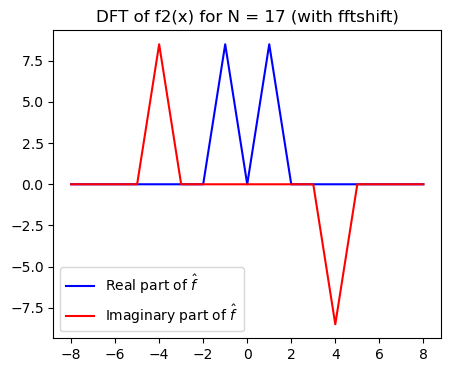

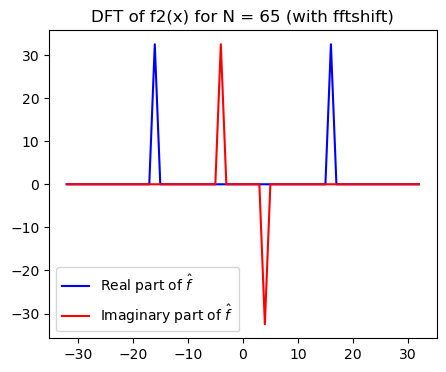

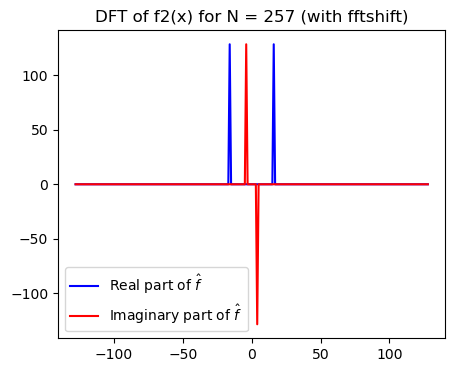

In [42]:
# Define the function f2(x)
def f2(x):
    return np.sin(8*np.pi*x) + np.cos(32*np.pi*x)

# Define the function to compute and plot the DFT
def dft_plot(f, N):
    x = np.linspace(-0.5, 0.5, N, endpoint=False)  
    f_values = f(x)  
    f_hat = fft(f_values)  
    f_hat_shifted = fftshift(f_hat) 

    # Plot the real and imaginary parts of the DFT
    plt.figure(figsize=(5, 4))

    freq = fftshift(fftfreq(N,1/N))

    plt.plot(freq, np.real(f_hat_shifted), label="Real part of $\hat{f}$", color="blue")
    plt.plot(freq, np.imag(f_hat_shifted), label="Imaginary part of $\hat{f}$", color="red")
    
    plt.title(f"DFT of f2(x) for N = {N} (with fftshift)")
    plt.legend()
    plt.show()

# Plot for different N values
for N in [17, 65, 257]:
    dft_plot(f2, N)

The plot seems right because the plot is suppossed to shows the frequency content of the function $f_2(x)$. The peak should be at $8\pi$ and $32\pi$ because it is here that the dominant frequencies are. The real, blue part aligns with the function’s real-valued nature, and the imaginary, red part contains smaller variations due to the nature of the Fourier transform.

By using fftshift, we are centering the zero frequency in the middle of the plot. The spikes in the plot do therefore not allign with exactly $8\pi$ and $32\pi$, beacuse what we are seeing are the shifted versions of the dominant frequencies in the function.

The Fourier series expansion of a function is defined like

$$
f(x) = \frac{a_0}{2} + \sum_{k=1}^{\infty} \left( a_k \cos(2\pi k x) + b_k \sin(2\pi k x) \right)
$$

In our case, the function is 

$$
f_2(x) = \sin(8\pi x) + \cos(32\pi x),
$$

we can identify the Fourier coefficients without solving the integral, by just simply looking at our function $f_{2}(x)$

We can see that the sine term is with frequency 4, because $8\pi$ is $2\pi*4$. That means, the term $ \sin(8\pi x)$ corresponds to $b_4 = 1$ and $a_4 = 0$.
Likewise, the cosine term is with frequency 16, and $\cos(32\pi x)$  corresponds to $a_{16} = 1$ and $b_{16} = 0$.

There are no other terms, so all other Fourier coefficients are zero, that is 
$a_0 = 0$ since there are no constant term and
$a_k = 0$ and $b_k = 0$ for $k \neq 4, 16$.



We can also compute $c_{k}(f_{2})$. From the disduccion above, we know that the sine term has frequency components at $k$=8 and $k$ = -8, and the cosine tern has at $k$=32 and $k$=-32. By using Eulers formula, we then get 

$$
e^{i \theta} = \cos(\theta) + i \sin(\theta)
$$

So we get

For $ k = 8 $:  $c_8(f_2) = -\frac{i}{2} $

For $ k = -8 $: $ c_{-8}(f_2) = \frac{i}{2} $

For $k = 32 $:, $ c_{32}(f_2) = \frac{1}{2} $


For $k = -32$: $ c_{-32}(f_2) = \frac{1}{2} $


Moreover, using Euler’s identity, we can use the coefficients to remove the second summand of $f_2$ by modifying $\hat{f} \in \mathbb{C}^{257}$. The main concept here is that we set the Fourier coefficients that correspnds to the different frequencies components of the signal when we compute the DFT of $f_2$. That is, the term $\sin(8\pi x)$  contributes to frequencies  $ 8 \pi $ and the term $\cos(32\pi x)$  contributes to frequencies  $32 \pi $. This means after computing the Fourier transform, we can remove the second summand $\cos(32 \pi x)$ by setting the corresponding coefficients to 0.


However, it is not pssoible to remove the $cos(32\pi x)$ from the function $f_2(x)$ when using only N=17. With such a small number of sample points, the DFT can not resolve the high-frequency component $32\pi $. A higher number of sample points are required to capture both $ 8\pi$ and $32\pi$ components (like N=257).

### Problem 2


Now, we want to consider signal processing. Convolution is essential in signal processing because it is used for filtering signals. When working with discrete signals, as we do in this task, we perform a cyclic convolution. Cyclic convolution consider the fact that the signals are periodic.

#### 2a)


When we convolve $a$ with a shifted version of $b$, denoted as $b'$, the result will simply be a shifted version of the original convolution result. 

The cyclic convolution of two signals is defined as

$$
c_j = (a \ast b)_j = \sum_{k=0}^{N-1} a_k b_{j-k \mod N}
$$

If we now consider $b'$ the shifted version of $b$:

$$
b' = (b_{N-1}, b_0, \dots, b_{N-2})
$$

This is just $b$ shifted by one position. The convolution with this shifting then becomes

$$
c'_j = (a \ast b')_j = \sum_{k=0}^{N-1} a_k b'_{j-k \mod N}
$$

We know that $ b'_i = b_{i-1 \mod N}$, so:

$$
c'_j = \sum_{k=0}^{N-1} a_k b_{j-k-1 \mod N}
$$

This is essentially the same as the original convolution, except that the indices of $b$ are shifted by one position to the right because in $c_{j}'$ we have $b_{j-k-1 mod  N}$ which is just $b$ which is shifted by 1. 

So we have that

$$
c = (c_0, c_1, c_2, \dots, c_{N-1})
$$

And the shifted convolution will be:

$$
c' = (c_{N-1}, c_0, c_1, \dots, c_{N-2})
$$



#### 2b) 

First we want to show that for $f, g \in L^1(T)$, the Fourier coefficients of the convolution satisfy:

$$
c_k(f \ast g) = c_k(f) c_k(g), \quad \text{for all } k \in \mathbb{Z}.
$$

We can note that the Fourier coefficient $c_k(f)$ for a function $f \in L^1(T)$ is defined as:

$$
c_k(f) = \int_T f(x) e^{-2\pi i k x} \, dx.
$$

Similarly, for $g \in L^1(T)$.

Moreover the convolution of two functions is given by:

$$
(f \ast g)(x) = \int_T f(y) g(x - y) \, dy.
$$

The Fourier coefficient of  $ f \ast g$ is therefore

$$
c_k(f \ast g) = \int_T \left( \int_T f(y) g(x - y) \, dy \right) e^{-2\pi i k x} \, dx.
$$


Using Fubini's Theorem, we can swap the order of integration:

$$
c_k(f \ast g) = \int_T f(y) \left( \int_T g(x - y) e^{-2\pi i k x} \, dx \right) \, dy.
$$

Evalutaing this integral by substituition, we have 
$$
c_k(f \ast g) = \int_T f(y) e^{-2\pi i k y} \, dy \cdot \int_T g(z) e^{-2\pi i k z} \, dz.
$$

But these integrals are just the Fourier coefficients $c_k(f)$ and $c_k(g)$, so:

$$
c_k(f \ast g) = c_k(f) c_k(g).
$$



We also have the fact that the convolution in time turns into multiplication in the frequency domain

$$
\widehat{a \ast b} = \hat{a} \circ \hat{b},
$$

where the element-wise product $\circ$ is defined as:

$$
(\hat{c} \circ \hat{d})_j = \hat{c}_j \hat{d}_j, \quad j = 0, 1, \dots, N - 1.
$$

This is the same case as the continuous one, where the Fourier transform of a convolution is the product of the Fourier transforms of the individual functions.
This is really useful, because if we have large signals, the direct convulution is quite computationally expensive, while element-wise multiplication in the frequency domain is much cheaper.


#### 2c) 

When we want to use the equidistant samples $d_{j}$ as a filter, it is easier to use the discrete Fourier domain. This is beacuse we can then perform the convolution by element-wise multiplication, which is computationally simpler and faster.

De la Vallée-Poussin mean $V_{n,m}(x)$ is given by:

$$
V_{n,m}(x) = \frac{1}{2n} \left( 1 + 2 \sum_{k=1}^{n-m} \cos(2\pi k x) + 2 \sum_{k=n-m+1}^{n+m-1} \frac{m+n-k}{2m} \cos(2\pi k x) \right)
$$

However, we can see that this V is already a sum of cosine terms. That means for $k \leq n - m$, the weight of the cosine term $\cos(2\pi k x)$ is 1. So that means the Fourier coefficient for these terms are

$$
c_k = \frac{1}{n}
$$

Moreover, for $n - m < k \leq n + m - 1$, the weight of the cosine term $ \cos(2\pi k x)$ is $ \frac{m+n-k}{2m} $. Hence, the Fourier coefficient for these terms is:

$$
c_k = \frac{m+n-k}{n m}
$$

For other $k$, the Fourier coefficient is 0:

$$
c_k = 0
$$





### 2d) 


We will now see what happens to $f_{5}(x) = sin(32\pi x)+cos(129\pi x)$ after convolving with De la Vallée-Poussin mean $V_{n,m}(x)$, and sampling $f$ with 512 samples.

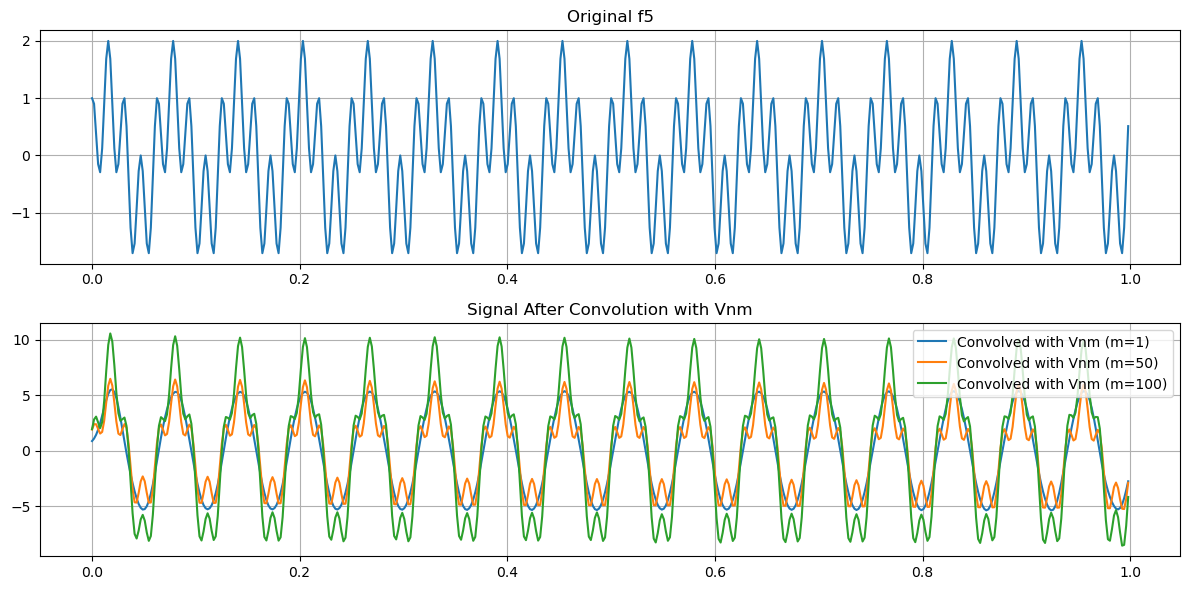

In [5]:
#Constants
N = 512 
x = np.arange(N)/N #N equally spaced points 

# Our function
def f5(x): 
    return np.sin(32*np.pi*x) + np.cos(128*np.pi*x)

f5_samples = f5(x)

# Convolve this sampled signal with the de la Vallée Poussin
def V(x, n, m):
    summ1= np.sum([np.cos(2 * np.pi * k * x) for k in range(1, n - m)], axis=0) #summing along the rows
    summ2 = np.sum([(m + n - k) / (2 * m) * np.cos(2 * np.pi * k * x) for k in range(n - m + 1, n + m - 1)], axis=0)
    return (1 / (2*n)) * (1 + 2*summ1 + 2*summ2)


# Sample Vn,m with n=48 and m=1
n = 48 
m_val = [1, 50, 100] # Different m values for analysis 
convolved_signals = []

for m in m_val:
    V_samples = V(x, n, m)
    V_shift = fftshift(V_samples)
    convolved_signal = np.convolve(f5_samples, V_shift, mode='same')
    convolved_signals.append(convolved_signal)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot f5
plt.subplot(2, 1, 1)
plt.plot(x, f5_samples, label='Original f5')
plt.title('Original f5')
plt.grid(True)

for i, m in enumerate(m_val):
    plt.subplot(2, 1, 2)
    plt.plot(x, convolved_signals[i], label=f'Convolved with Vnm (m={m})')

plt.title('Signal After Convolution with Vnm')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



Here we can see that the de la Vallée-Poussin kernel acts as a low-pass filter. This means it allows low-frequency components to pass through, so as $m$ increases, less high-frequency content are allowed to pass which leads to a smoother resulting signal after convolution. In other words, with small $m$, the convolution has more of the high-frequency components, but when $m$ increases the filter removes the high-frequency oscillations and producing a much smoother signal (as seen in the green graph).

In the context of the plot above, we can see that when $m$ increases, the signal bcomes smoother. When $m$ is 100 (green graph), we can see that almost all the high-frequency oscillations are filtered out, leaving a very smooth signal dominated by the low-frequency component. 

#### 2e) 

Given the signal from project1-signal-data.csv, we now want to convolve this signal with two kernels, namely the the Dirichlet kernel (Or the De la Vallée-Poussin mean $V_{92, 10}(x)$ and the discrete kernel h.

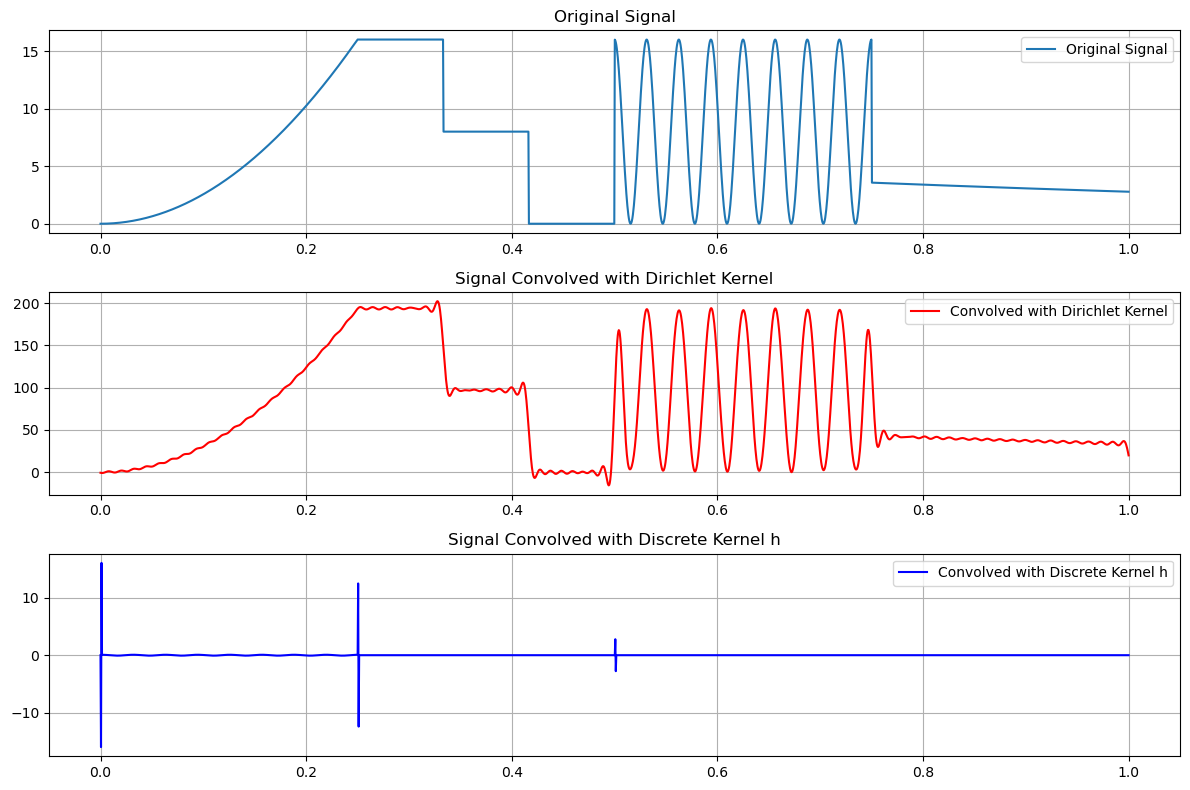

In [37]:
# Reading the signal data
data = pd.read_csv('project1-signal-data.csv')
x = data['x'].values
signal = data['signal'].values

# Parameters
N = len(signal)  
n = 92  # Parameter for Dirichlet kernel
m = 10  

# Dirichlet kernel, V function from 2d)

dirichlet_kernel = V(x, n, m)
dirichlet_shift = fftshift(dirichlet_kernel)

# Kernel h
h = np.zeros(N)
h[:3] = [-1,2,-1]
# h = np.array([-1, 2, -1] + [0] * (N - 3))

# Performing convolution with the signal
V_convolved = np.convolve(signal, dirichlet_shift, mode = 'same')
h_convolved = np.convolve(signal, h, mode ='same')

# Step 5: Plot and Analyze the Results
plt.figure(figsize=(12, 8))

# Original Signal
plt.subplot(3, 1, 1)
plt.plot(x, signal, label='Original Signal')
plt.title('Original Signal')
plt.grid(True)
plt.legend()

# Convolved with Dirichlet Kernel
plt.subplot(3, 1, 2)
plt.plot(x, V_convolved, label='Convolved with Dirichlet Kernel', color='r')
plt.title('Signal Convolved with Dirichlet Kernel')
plt.grid(True)
plt.legend()

# Convolved with h
plt.subplot(3, 1, 3)
plt.plot(x, h_convolved, label='Convolved with Discrete Kernel h', color='b')
plt.title('Signal Convolved with Discrete Kernel h')
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()



The blue graph is the original singal, while the red graph shows the signal after convolving with the Dirichlet kernel (or the $V_{92, 10}(x)$ kernel). This kernel acts like a low-pass-filter due to the fact that it smooths out strng variations.

The third and blue curve represents the result of convolving the signal with a discrete kernel. It looks like this kernel acts like a high-pass filter which can be seen as  discontinuities in the graph as well as reducing the smoother parts of the signal. Where there are significant changes in the signal, the graph has sharp spikes. In other words, this kernel captures the rate of the change in the signal.

Analysis of each interval:

Interval [0, 0.4]:

Here the original signal gradually increases. The $V_{92, 10}(x)$ kernel smooths out this increase while the the discrete kernel $h$ shows the rate of the change. Where the change is gradual, we can see that the convolution remains close to 0. 

Interval [0.4, 0.6]:

In this interval, $V_{92, 10}(x)$ smoothes out the sharp transition at 0.4, while the discrete kernel $h$ has a spike due to the sudden change in the signal (sudden transition).

Interval [0.6, 1.0]:

Both the convolutions managed to capture the oscillatory part of the signal. Howvever, the $V_{92, 10}(x)$ kernel smooths it slightly, while the $h$ kernel mostly highlights rapid changes with spikes.

The $V_{92, 10}(x)$ kernel emphasizes low-frequency components, while the discrete kernel $h$ capture sharp transitions. The kernel $h$ can be really helpful for detecting rapid changes in the signal. By convolving a signal with these to kernels, we can get a clearer understanding of the signal’s overall behavior.

### Problem 3

Audio signals are repeating change in the air pressure. Sampling or discretize this change in the air pressure allows us to get a discrete signal of such signal. The sampling rate is measured in Hz. 

#### 3a)

We will start with implementing a sine function that produces the concert pitch, sample this function, and then play this sound. Moreover, we will also plot the spectrum and consider how long the signal is.



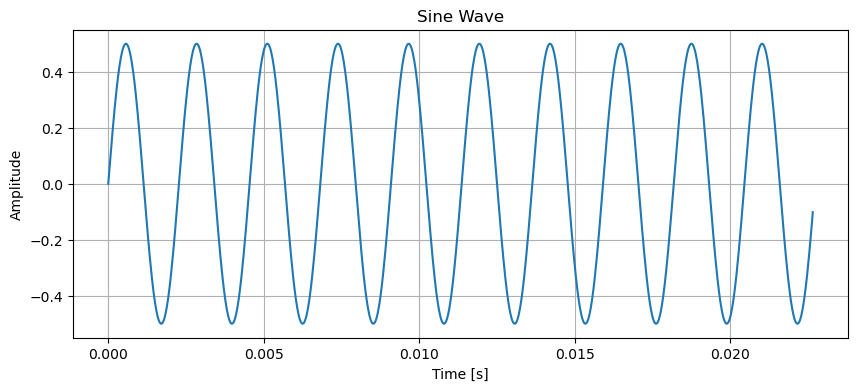

Sine wave length: 132300 samples


In [23]:
# Parameters
f = 440 #Hz
sampling_rate = 44.1e3
tot_samples = int(sampling_rate * 3)  #Sampling rate * 3 seconds
t = np.linspace(0,3,tot_samples) #time vector from 0 to 3 

# Sine wave
sine_wave = 0.5 * np.sin(2*np.pi*f*t)  # 0.5 just for amplitude scaling

# Plot 
plt.figure(figsize=(10, 4))
#plt.plot(t, sine_wave)  # Too many data points in a small section, just a blue rectangle
plt.plot(t[:1000], sine_wave[:1000]) ## Plot only the first 1000 samples 

plt.title("Sine Wave")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Play the sine wave
sd.play(sine_wave, samplerate=sampling_rate)
sd.wait()  # Wait until the sound has finished playing

# Length of the signal
sine_length = len(sine_wave)
print(f"Sine wave length: {sine_length} samples")

### 3b) 

We will now transform the sine wave into the frequency domain using the FFT, and then plotting the result to show the dominant 440 Hz frequency.


 

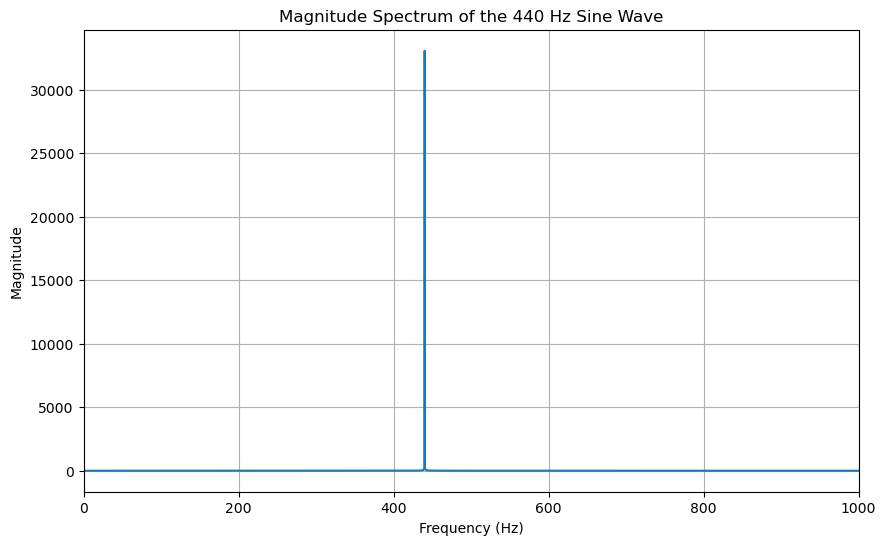

In [11]:
# FFT transoform
DFT = fft(sine_wave)
magnitude_spectrum = np.abs(DFT)

sampling_rate = 44.1e3 # Frequency bins
freq = np.fft.fftfreq(len(sine_wave), 1 / sampling_rate) # Frequency bins associated with each DFT value

new_length = len(sine_wave) // 2
pos_freq= freq[:new_length] # Positive frequencies
pos_spectrum = magnitude_spectrum[:new_length]

# Plot 
plt.figure(figsize=(10, 6))
plt.plot(pos_freq, pos_spectrum)
plt.title('Magnitude Spectrum of the 440 Hz Sine Wave')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 1000)
plt.grid(True)
plt.show()

This looks right! The DFT transform the signal into a frequency domain, and since the sine wave is a pure tone, we excpect the frequency spectrum plot to consist of exactly one sharp peak. The peak should be at 440 Hz which is the frequency of this sine wave, something that looks almost perfect with the plot above. 

### 3c) 

Now, we will study music.flac. We will start by increasing the speed of it by a factor of 2 without increasing the pitch. In order to do this, I will use $librosa$ which is a python package for music and audio analysis. Using scipy.signal.resample will also let us work with the speed of the audio data.






In [24]:
# Original sound (without increased speed)
filename = 'music.flac'

# Load the audio with sound_file
data, sampling_rate = sf.read(filename, dtype='float32')
sd.play(data, samplerate= sampling_rate)
sd.wait()


# The sound lasts for 55.0s

The main idea to increase the speed of the signal is to reduce the number of samples in the audio. 

In [25]:
# Music flat where the speed is increased by a factor of 2

num_samples_faster = int(len(data)/2) 
data_fast = resample(data, num_samples_faster)

# Play the faster audio with the original sampling rate 
# That is, same pitch but faster
sd.play(data_fast, samplerate=sampling_rate)
sd.wait()


It worked! The audio now plays faster in the same pitch.

#### 3d) 

We will now do the opposite. Taking music.flac, we will increase the tone height by an octave without increasing the speed. That is, doubling the sampling rate by a factor of 2, which is the same as raising the pitch higher. 



In [2]:
#Load the audio with librosa.load
data1, samplerate1 = librosa.load("music.flac", sr = None)
new_data = librosa.effects.time_stretch(data1, rate=0.5)

#Raising pitch
new_sample_rate = samplerate1*2

sd.play(new_data, new_sample_rate)
sd.wait()

#### 3e) 

By reducing the amount of data transmitted per second from the samples 44 100 numbers per second to 22 050, we will further analyze the sound and discuss the difference. Note that neither the pitch, nor the speed of the audio should change.

In [26]:
#Original, neither the pitch nor the speed change
#sd.play(data, samplerate= sampling_rate)

new_sampling_rate = 5012

num_samples = int(len(data) * (new_sampling_rate / sampling_rate))

data_sampled_down = resample(data, num_samples)

sd.play(data_sampled_down, samplerate=new_sampling_rate)
sd.wait()

By first reducing the samples from 44 100 numbers per second (Hz) to 22 050 Hz, I do not hear any difference. We humans can hear sounds up to around 20 kHz, so when we downsample to 22 050 Hz, we are still within the range of human hearing, so the frequencies in the adio is preserved. 

However, when reducing it again down to 11 025 Hz, the sound starts to change. This is beacuse we approach the Nyquist frequency which is half of the sampling rate. This means fewer high-frequency components can be accurately represented. This is called aliasing, namely when higher frequencies get cut off which leads to a loss of detail in the sound.

In other words, frequencies above the Nyquist frequency become aliase when we are at lower sample rates. This is the reason why the sound is like “underwater.”


#### 3f) 


In the last part of the project, we will study noisy.flac. By listening to the sound, we will try to find the sample rate and compare it to music.flac when we reduced the sample rate. 



In [11]:
# Original sound
filename = 'noisy.flac'

# Extracting the data and sampling rate from the file 
data_noisy, sampling_rate_noisy = sf.read(filename, dtype='float32')
sd.play(data_noisy, samplerate= sampling_rate_noisy)
sd.wait()

print(sampling_rate_noisy)

16000


Here, the sampling rate is 16000 Hz, and it is almost impossible to hear the sound.
As already explained, the Nyquist frequency is half of the sampling rate. The Nyquist frquency is in other words the highest frequency that can be accurately represented. 

This sound (noisy.flac) has a sampling rate of 16000 Hz, so the Nyquist frequency is 800 Hz. This means that only frequencies up to 800 Hz can be accurately represented. Human speech is typically in the range up to 4 kHz so a sampling rate of 1600 Hz is way too low and as a consequence, we will have a hard time hearing what is being said in the audio due to the sound being really blurry

#### 3g) 

Lastly, we will try to remove the noise from the signal by investigating its sprectrum. In order to do that, we will use the Short-Time Fourier Transform (STFT) which is refered to in this problem. The main idea is to divide the sound into shorter segments of equal length, and then, on each segment, we will compute the Fourier transform spearately. By doing this, we will get the Fourier spectrum on each shorter segment. 

We will start by analyzing the frequency spectrum before the noise reduction, so that we can identify noise-heavy frequencies. After that, we will then apply a window function that uses de-la-Valée-Poussin to remove these unwanted noise-heavy frequencies. By convolving the noisy signal with this suitable filter, we can then reduce the noise and (hopefully) get a clearer sound. 


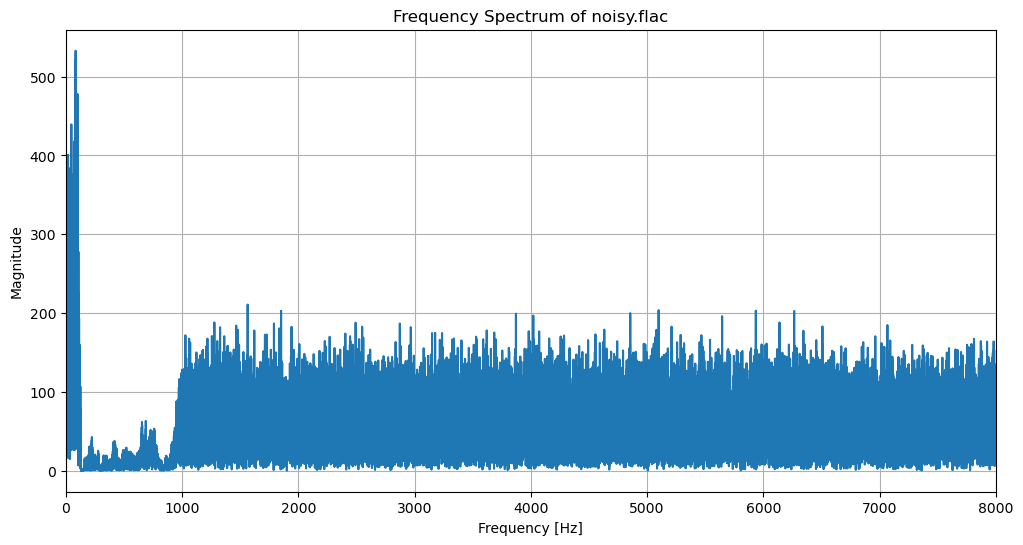

In [3]:
# Reading the signal/sound
filename = 'noisy.flac'
noisy_signal, sampling_rate = sf.read(filename)

# Perform FFT
n = len(data_noisy)  
data_fft = np.fft.fft(data_noisy)  # Perform FFT
fft_magnitude = np.abs(data_fft)  # Magnitude spectrum
frequencies = np.fft.fftfreq(n, d=1/sampling_rate_noisy)

# Plotting only the positive frequencies
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:n//2], fft_magnitude[:n//2])  # Positive frequencies
plt.title('Frequency Spectrum of noisy.flac')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, sampling_rate_noisy / 2)  # Limit x-axis to Nyquist frequency
plt.grid(True)
plt.show()

Now, we will try to reduce the noise. In order to do this, the main idea is to use a window function using de-la-Valée-Poussin, and convolve this with the signal.

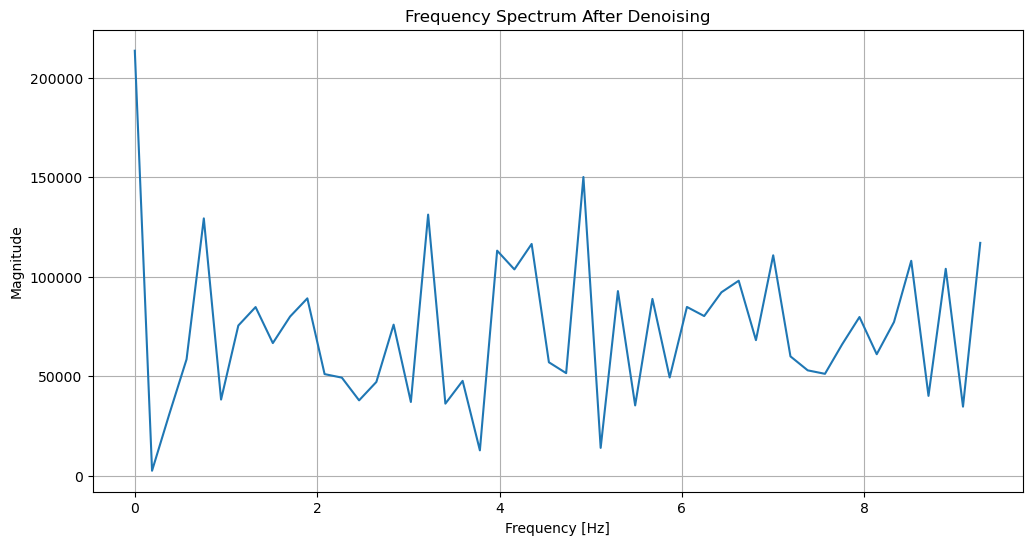

In [6]:
# STFT of the sound
freq, times, Zxx = signal.stft(noisy_signal, fs=sampling_rate, nperseg=256, noverlap=128)
time = np.linspace(0, len(noisy_signal) / sampling_rate, num=len(noisy_signal))

'''STFT: 
Output: 
freq: array of sample frequencies.

t: array of segment times.

Zxx: array STFT of x
'''

# A window function using de-la-Valée-Poussin from previous problems above
def window_func(n, m, length):
    x = np.linspace(0, 1, length)
    window = V(x, n, m)
    return window

n = 100  
m = 10 # We will start with m=10 first, and then vary it later
window_length = len(data_noisy)
V_window = window_func(n, m, window_length)

# Shift and Convolve
noisy_signal_shift = fftshift(noisy_signal)
V_window_shift = fftshift(V_window)
signal_filtered = np.convolve(noisy_signal_shift, V_window_shift, mode='same')

# STFT after filtering
freq_reduced, times_reduced, Zxx_reduced = signal.stft(signal_filtered, fs=sampling_rate, nperseg=256, noverlap=128)

# Play the filtered signal
sd.play(signal_filtered, samplerate=sampling_rate)
sd.wait()

# Plot frequency spectrum after denoising
data_fft_filtered = np.fft.fft(signal_filtered)
fft_magnitude_filtered = np.abs(data_fft_filtered)

plt.figure(figsize=(12, 6))
plt.plot(frequencies[:n//2], fft_magnitude_filtered[:n//2])
plt.title('Frequency Spectrum After Denoising')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

It did not work as I hoped it would. The noise is still there, so we have to think of another way to remove the noise. The stretagy now is to have a bandpass-filter and a noise-reducuction filter on from noise reduce, in hope that this would reduce the noise in the signal.

In [7]:
# Defining bandpass filter function
def bandpass_filter(freq, cutoff_low, cutoff_high):
    a_filter = np.zeros_like(freq)
    a_filter[(freq > cutoff_low) & (freq < cutoff_high)] = 1
    return a_filter

def apply_filter_and_plot(data_noisy, frequencies, fs):
    N = len(data_noisy)
    f = fftfreq(N, 1/fs)    

    cutoff_high = 800
    cutoff_low = 100

    bandpass = bandpass_filter(f, cutoff_low, cutoff_high)

    # Applying filter to FFT of the noisy data
    noisy_fft = fft(data_noisy)
    filtered_fft = noisy_fft * bandpass

    filtered_noise = ifft(filtered_fft)  # Time domain
    filtered_noise *= 200

    noise_reduced = nr.reduce_noise(y=filtered_noise.real, sr=fs) # Noise reduction

    # Playing the sound
    sd.play(noise_reduced.real, samplerate=fs)
    sd.wait()

apply_filter_and_plot(data_noisy, frequencies, sampling_rate_noisy)



Yey! It worked! It is still not possible to hear clearly what she said, but we managed to reduce the noise! The strategy here is to take the signal from the time domain and shift it into the frequency domain. The reason for doing this is to isolate the frequency components that causes the noise. Then, we create a bandpass filter by specifying a range of frequencies between cutoff_low and cuoff_high that we want to preserve. Since we chose cutoff_low and cutoff_high to be 100 and 800, we filtered out frequencies below 100 Hz and above 800 Hz. This was in hope that we could filter out the unwanted noise. By multiplying the FFT of the original signal with the bandpass filter, we managed to filter out the unwanted frequencies. Furthermore, we also used a noise-reduction filter from noise reduce to further reduce unwanted background noise. After filtering the frequency domain signal, we convert the signal back to the time domain using the IFFT.

Now,  we will investigate the effect of the parameter $m$. Changing $m$ will affects how the signal is filtered. That is due to the fact that the window function is used in convolution with the noisy signal. Different values of $m$ will give different filter shapes and hence different filtering outcomes.

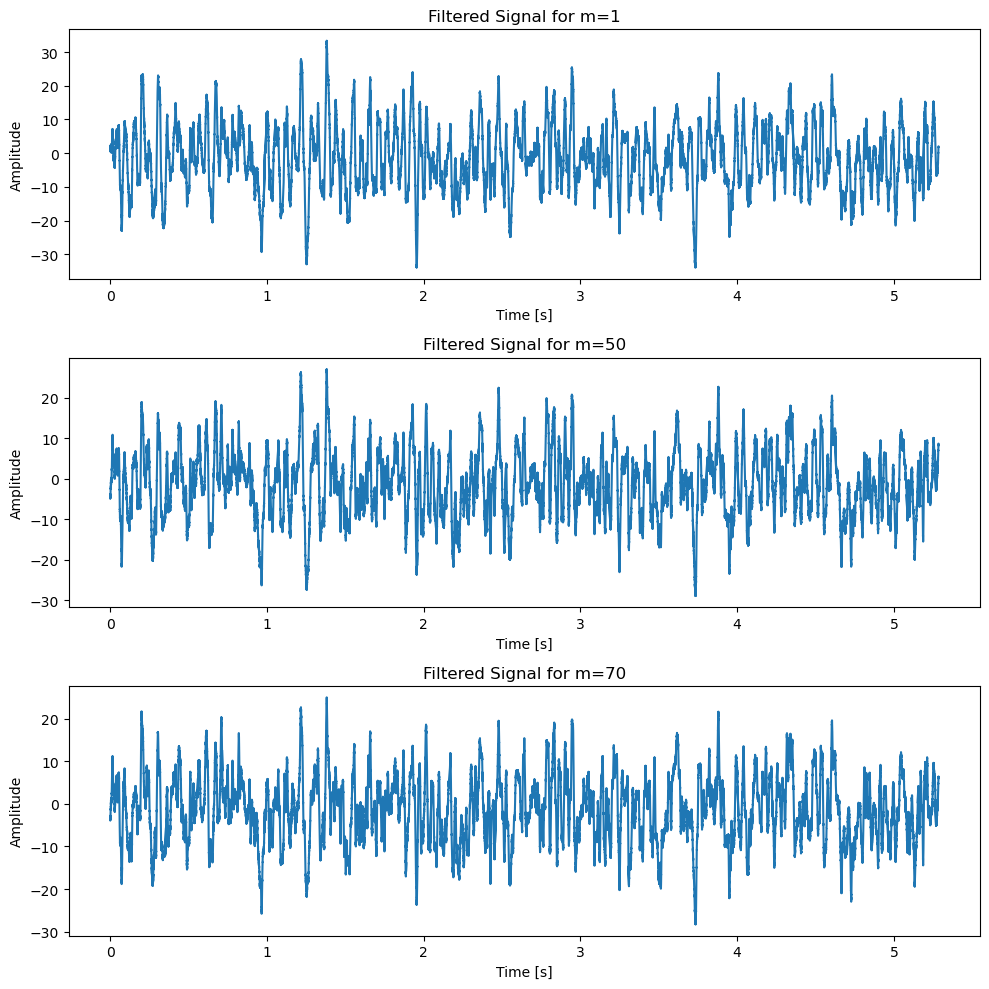

In [10]:
m_val = [1, 50, 70]  
signal_filtered_list = []
sampling_rate = 16000  

plt.figure(figsize=(10, 10))

for i, m in enumerate(m_val):
    V_window = window_func(n, m, window_length)  
    filtered = np.convolve(data_noisy, V_window, mode='same') 
    signal_filtered_list.append(filtered)
    
    # Plot
    plt.subplot(3, 1, i+1)
    time = np.arange(len(filtered)) / sampling_rate 
    plt.plot(time, filtered)
    plt.title(f'Filtered Signal for m={m}')
    plt.ylabel('Amplitude')
    plt.xlabel('Time [s]')
    
plt.tight_layout()
plt.show()

Here we can see that $m$ controls the strength of the filtering. More high-frequency components are removed from the signal for higher values of $m$,and smaller values of $m$ allow more high-frequency components to pass through. To conclude, we need to be careful when using a large $m$ value. Although this corresponds to a broader window that removes high-frequency compnents which leads to a smoother signal, a too large value of $m$ can potentially remove important details with the signal